# Practice Case 4 (Mallianz)

## Basic Exploratory

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as scs
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
print("(rows, columns) =",df.shape)
df.head(6)

(rows, columns) = (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
#See type of variables in the data
#See if there missing value in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#See 5 points of summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


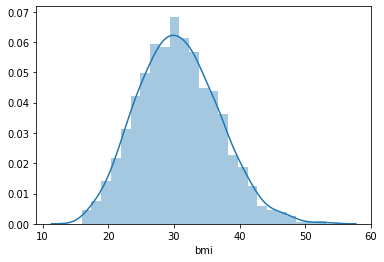

In [5]:
chart,ax= plt.subplots()
ax= sns.distplot(df['bmi'])

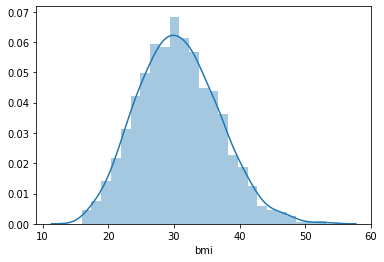

In [6]:
chart

In [7]:
#E. Distribution of 'bmi', 'age' and 'charges' columns
#F. The measure of skewness of 'bmi', 'age', and 'charges' columns
#G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

def AllInOne(var,data):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)})
    sns.boxplot(data[var] ,  ax=ax_box).set(title="{} Distribution".format(var))
    sns.distplot(data[var], ax=ax_hist)
    fig.set_size_inches(10,5)
    summary           = data.describe()
    Q1                = summary.loc["25%",var]
    Q3                = summary.loc["75%",var]
    IQR               = Q3-Q1
    outlier_Low       = Q1-(1.5*IQR)
    outlier_High      = Q3+(1.5*IQR)
    n_low_outlier     = len(data[data.loc[:,var]<outlier_Low])
    n_high_outlier    = len(data[data.loc[:,var]>outlier_High])
    sum_outlier=print('Total Outlier under 1.5*IQR is {}'.format(n_low_outlier),
                     '\nTotal Outlier upper 1.5*IQR is {}'.format(n_high_outlier),
                     '\nSo, the Total Outlier on {} is {}'.format(var, (n_low_outlier+n_high_outlier)))
    
    skew       =print('\nThe Skewness of {} Distribution is {}'.format(var, df[var].skew()))

Total Outlier under 1.5*IQR is 0 
Total Outlier upper 1.5*IQR is 9 
So, the Total Outlier on bmi is 9

The Skewness of bmi Distribution is 0.2840471105987448


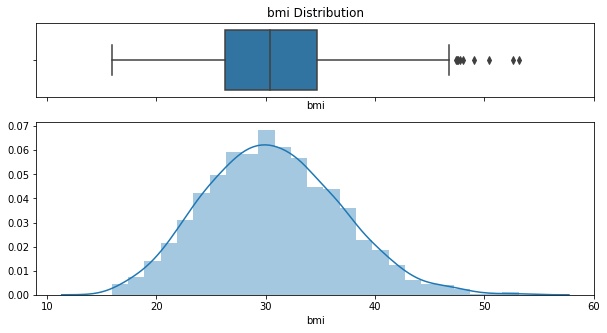

In [8]:
AllInOne("bmi", df)

Total Outlier under 1.5*IQR is 0 
Total Outlier upper 1.5*IQR is 0 
So, the Total Outlier on age is 0

The Skewness of age Distribution is 0.05567251565299186


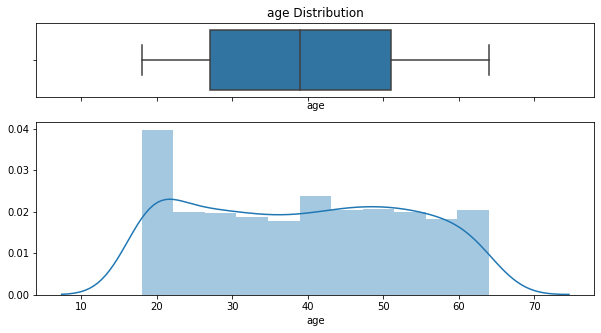

In [9]:
AllInOne("age",df)

Total Outlier under 1.5*IQR is 0 
Total Outlier upper 1.5*IQR is 139 
So, the Total Outlier on charges is 139

The Skewness of charges Distribution is 1.5158796580240388


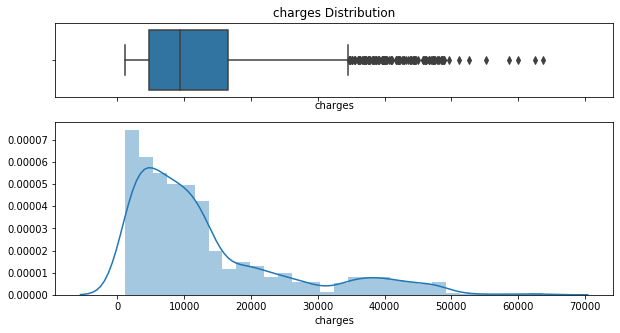

In [10]:
AllInOne("charges",df)

## Hypothesis of Smoker

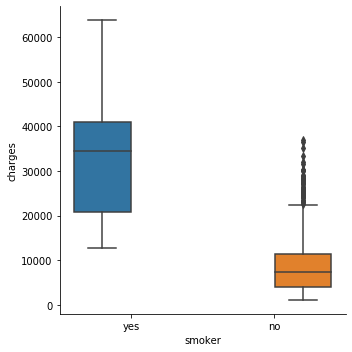

In [11]:
Smoker = df[df['smoker']=='yes']
non_Smoker = df[df['smoker']=='no']
a=sns.catplot(x="smoker", y="charges", hue="smoker", kind="box", data=df)

Total Outlier under 1.5*IQR is 0 
Total Outlier upper 1.5*IQR is 0 
So, the Total Outlier on charges is 0

The Skewness of charges Distribution is 1.5158796580240388


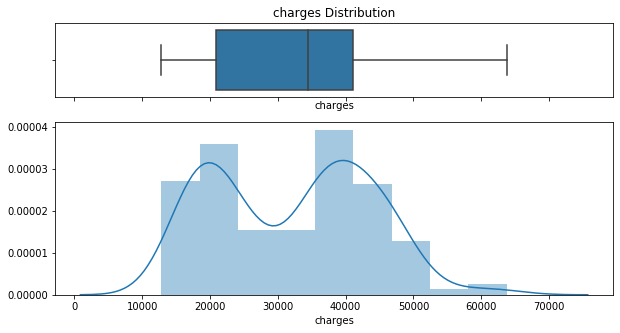

In [12]:
AllInOne("charges", Smoker)

Total Outlier under 1.5*IQR is 0 
Total Outlier upper 1.5*IQR is 46 
So, the Total Outlier on charges is 46

The Skewness of charges Distribution is 1.5158796580240388


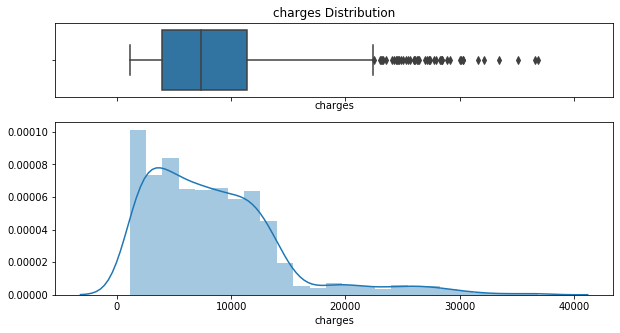

In [13]:
AllInOne("charges", non_Smoker)

In [14]:
from scipy.stats import ttest_ind as t

test,pval=t(Smoker['charges'],non_Smoker['charges'])
print('p-value =', pval)

if pval< 0.05:
    print('Reject H0')
else:
    print("Don't reject H0")

p-value = 8.271435842177219e-283
Reject H0
